# Imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

# Load Audio

In [0]:
x, sr = lr.load('violin.mp3')
display(Audio(x, rate=sr))

# RMS

Root Mean Square

$x_{\text{RMS}}={\sqrt {{\frac {1}{n}}\left(x_{1}^{2}+x_{2}^{2}+\cdots +x_{n}^{2}\right)}}$


$x_{\text{mean}}={{{\frac {1}{n}}\left(x_{1}+x_{2}+\cdots +x_{n}\right)}}$

In [0]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 9, 10])

In [0]:
# mit for loop:
n = np.shape(a)[0]
sum_ = 0
for num in a:
    sum_ += num

print(sum_ / n)

5.222222222222222


In [0]:
# mit np.sum
n = np.shape(a)[0]
sum_ = np.sum(a)

print(sum_ / n)

5.222222222222222


In [0]:
rms = np.sqrt(1 / np.shape(x)[0] * np.sum(x**2))

In [0]:
# np.mean:
mean = np.mean(a)

print(mean)

5.222222222222222


In [0]:
# das "square" in rms sorgt dafür, dass der errechnete Mittelwert
# immer positiv ist.
b = a * -1

print(b)
print(np.sqrt(np.mean(b ** 2)))

[ -1  -2  -3  -4  -5  -6  -7  -9 -10]
5.972157622389639


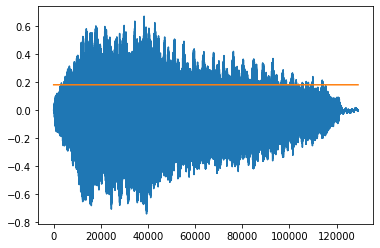

In [0]:
rms = np.sqrt(np.mean(x ** 2))
#      root    mean   square

plt.plot(x)
plt.plot(np.ones(np.shape(x)[0]) * rms)

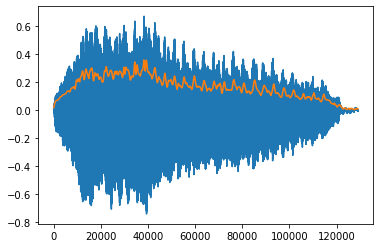

In [0]:
def calc_rms(x, hop_length=200, window_size=500):
    
    num_wins = int((np.shape(x)[0] - window_size) / hop_length)

    rms_env = np.array([])

    for i in range(num_wins):
        win = x[i * hop_length : i * hop_length + window_size]
        rms = np.sqrt(np.mean(win ** 2))
        rms_env = np.append(rms_env, rms)
    
    return rms_env

rms_env = calc_rms(x)
plt.plot(x)
t = np.linspace(0, np.shape(x)[0], np.shape(rms_env)[0])
plt.plot(t, rms_env)

In [0]:
# kurze Randnotiz zu Division in Python:
print(2 / 1)
print(2 // 1)
print(3 / 2)
print(3 // 2)

2.0
2
1.5
1


In [0]:
# anstatt eines for-loops, können wir für die Fensterung auch
# lr.util.frame verwenden:

framed_a = lr.util.frame(a, frame_length=3, hop_length=2)

print(a, "\n")
print(framed_a, "\n")
mean1 = np.mean(framed_a, axis=0)
print('Spalten: ', mean1, "\n")
mean2 = np.mean(framed_a, axis=1)
print('Zeilen: ', mean2, "\n")

[ 1  2  3  4  5  6  7  9 10] 

[[ 1  3  5  7]
 [ 2  4  6  9]
 [ 3  5  7 10]] 

Spalten:  [2.         4.         6.         8.66666667] 

Zeilen:  [4.   5.25 6.25] 



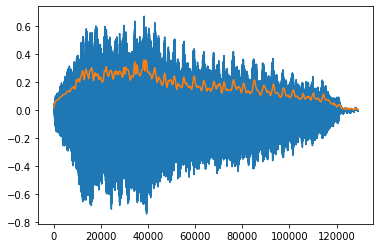

In [0]:
def calc_rms_framed_alternative(x, hop_length=200, window_size=500):
    
    x_framed = lr.util.frame(x, frame_length=window_size, hop_length=hop_length)
    rms_env = np.sqrt(np.mean(x_framed ** 2, axis=0))
    
    return rms_env

rms_env = calc_rms_framed_alternative(x)
plt.plot(x)
t = np.linspace(0, np.shape(x)[0], np.shape(rms_env)[0])
plt.plot(t, rms_env)